In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### 2. 서울시 음식점(음식점,  식당,  한식,  분식,  경양식,  중식,  일식) 데이터 추가

In [3]:
df_food = pd.read_csv('서울시 일반음식점 인허가 정보.csv', encoding='utf-8')
df_food.head()

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29144\540854303.py:1: DtypeWarning: Columns (2,8,9,14,16,24,25,27,28,29,30,31,34,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv('서울시 일반음식점 인허가 정보.csv', encoding='utf-8')


,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지우편번호,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,3010000,3010000-101-2023-00540,2023-11-03,NaN,1,영업/정상,1,영업,96.8,100-851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3230000,3230000-101-2023-00343,2023-05-12,NaN,1,영업/정상,1,영업,42.0,138-803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3230000,3230000-101-2023-00220,2023-03-31,NaN,1,영업/정상,1,영업,92.7,138-828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3230000,3230000-101-2023-00222,2023-03-31,NaN,1,영업/정상,1,영업,66.0,138-801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3230000,3230000-101-2023-00224,2023-03-31,NaN,1,영업/정상,1,영업,58.12,138-888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# '구' 정보 추출
pattern = r'(\S+구)'
df_food['구'] = df_food['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_food['구'].value_counts()

# 결과 출력
print(count_by_gu)

## 서울시 구 아닌거 날리기

강남구     48016
송파구     29321
마포구     27722
영등포구    26343
서초구     26300
강동구     22319
강서구     22306
관악구     21989
중구      21201
동대문구    21028
종로구     19675
구로구     18829
서대문구    17378
성북구     17356
광진구     17260
양천구     17048
중랑구     16910
은평구     16743
강북구     16298
노원구     15379
용산구     15357
성동구     14215
동작구     13819
금천구     13240
도봉구     11568
일산서구        2
영통구         1
일산동구        1
수영구         1
분당구         1
수정구         1
원미구         1
Name: 구, dtype: int64


In [5]:
# '상세영업상태명' 열의 값들 추출
unique_status_names = df_food['상세영업상태명'].unique()

# 결과 출력
print(unique_status_names)

['영업' '폐업']


In [6]:
# '상세영업상태명'이 '영업'인 경우에만 '구' 정보 추출
pattern = r'(\S+구)'
df_food['구'] = df_food[df_food['상세영업상태명'] == '영업']['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_food['구'].value_counts()

# 결과 출력
print(count_by_gu)

강남구     12530
마포구      8197
송파구      7324
영등포구     6884
종로구      6605
강서구      6311
중구       6069
서초구      5736
용산구      5120
관악구      4865
광진구      4289
동대문구     4185
구로구      4119
성동구      4076
성북구      4045
강동구      3979
은평구      3867
중랑구      3866
노원구      3721
서대문구     3554
강북구      3438
동작구      3243
금천구      3171
양천구      3119
도봉구      2306
원미구         1
Name: 구, dtype: int64


C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29144\3917211590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')


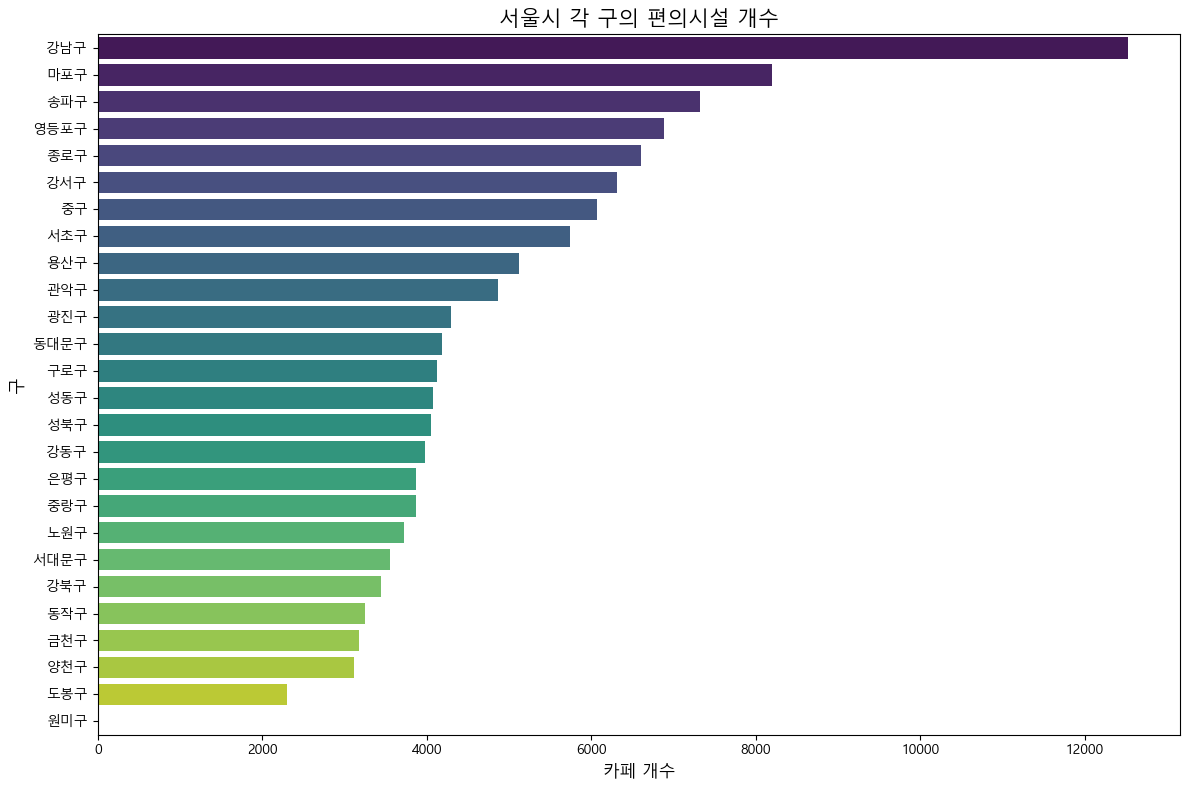

In [7]:
# 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# df 생성
df_count_by_gu = pd.DataFrame(list(count_by_gu.items()), columns=['구', '개수'])

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')
plt.title('서울시 각 구의 편의시설 개수', fontsize=15)
plt.xlabel('카페 개수', fontsize=12)
plt.ylabel('구', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
# 정규화 - 채택
normalized_values = {
    '강남구': 12530,
    '마포구': 8197,
    '송파구': 7324,
    '영등포구': 6884,
    '종로구': 6605,
    '강서구': 6311,
    '중구': 6069,
    '서초구': 5736,
    '용산구': 5120,
    '관악구': 4865,
    '광진구': 4289,
    '동대문구': 4185,
    '구로구': 4119,
    '성동구': 4076,
    '성북구': 4045,
    '강동구': 3979,
    '은평구': 3867,
    '중랑구': 3866,
    '노원구': 3721,
    '서대문구': 3554,
    '강북구': 3438,
    '동작구': 3243,
    '금천구': 3171,
    '양천구': 3119,
    '도봉구': 2306
}

# 최소값과 최대값 계산
min_value = min(normalized_values.values())
max_value = max(normalized_values.values())

# 정규화된 결과를 저장할 딕셔너리 초기화
normalized_results = {}

# 각 구의 정규화된 값을 계산하여 저장
for gu, value in normalized_values.items():
    normalized_value = (value - min_value) / (max_value - min_value)
    normalized_results[gu] = round(normalized_value, 4)  # 소수점 4자리까지 반올림하여 저장

# 결과 출력
for gu, value in normalized_results.items():
    print(f'{gu}: {value:.4f}')

# 혹은 정규화된 결과를 딕셔너리로 바로 출력
print(normalized_results)

강남구: 1.0000
마포구: 0.5762
송파구: 0.4908
영등포구: 0.4478
종로구: 0.4205
강서구: 0.3917
중구: 0.3681
서초구: 0.3355
용산구: 0.2752
관악구: 0.2503
광진구: 0.1940
동대문구: 0.1838
구로구: 0.1773
성동구: 0.1731
성북구: 0.1701
강동구: 0.1636
은평구: 0.1527
중랑구: 0.1526
노원구: 0.1384
서대문구: 0.1221
강북구: 0.1107
동작구: 0.0916
금천구: 0.0846
양천구: 0.0795
도봉구: 0.0000
{'강남구': 1.0, '마포구': 0.5762, '송파구': 0.4908, '영등포구': 0.4478, '종로구': 0.4205, '강서구': 0.3917, '중구': 0.3681, '서초구': 0.3355, '용산구': 0.2752, '관악구': 0.2503, '광진구': 0.194, '동대문구': 0.1838, '구로구': 0.1773, '성동구': 0.1731, '성북구': 0.1701, '강동구': 0.1636, '은평구': 0.1527, '중랑구': 0.1526, '노원구': 0.1384, '서대문구': 0.1221, '강북구': 0.1107, '동작구': 0.0916, '금천구': 0.0846, '양천구': 0.0795, '도봉구': 0.0}


In [9]:
df_merge1 = pd.read_csv('merge_1.csv') 

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29144\2080632856.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merge1 = pd.read_csv('merge_1.csv')


In [10]:
# '구' 정보 추출하여 상수 값 매핑
df_merge1['구'] = df_merge1['시군구'].str.extract(r'(\S+구)', expand=False)

# 각 '구'에 해당하는 상수 값 추가
df_merge1['일반음식점'] = df_merge1['구'].map(normalized_results)

# '구' 컬럼 삭제
df_merge1 = df_merge1.drop(columns=['구'])

# CSV 파일로 저장
df_merge1.to_csv('merge_2.csv', index=False)

In [11]:
df_output = pd.read_csv('merge_2.csv') 
df_output.tail()

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29144\3467741499.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv('merge_2.csv')


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,휴게음식점,일반음식점
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,0.1737,0.1527
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,0.1737,0.1527
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000,0.1737,0.1527
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000,0.1737,0.1527
1118821,서울특별시 중구 묵정동,11-67,11.0,67.0,묵정,52.46,200701,10,5,1981,...,임의,2020-07-10 00:00:00.0,Y,Y,127.000071,37.560706,2017-09-05 20:06:39.0,13250,0.4786,0.3681


In [12]:
# '일반음식점' 열의 null 값 개수 세기
null_count_general = df_output['일반음식점'].isnull().sum()
print(f'일반음식점 열의 null 값 개수: {null_count_general}')

# '시군구' 열의 null 값 개수 세기
null_count_sigungu = df_output['시군구'].isnull().sum()
print(f'시군구 열의 null 값 개수: {null_count_sigungu}')

일반음식점 열의 null 값 개수: 0
시군구 열의 null 값 개수: 0
